# 1) YFinance Data Setup

In [ ]:
# imports
import pandas as pd
import pandas_datareader.data as pdr
import datetime
import talib
from talib.abstract import *
from talib import MA_Type

import matplotlib.pyplot as plt 
plt.style.use('bmh')

In [ ]:
import yfinance as yf

# Collect Data for 1 min duration

data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
#         tickers = "SPY AAPL MSFT",
        tickers = "SBIN.NS",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "1d",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
#         group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

# Split Datetime to new columns
data2 = data.copy()

data2['hour'], data2['minute']  = data.index.hour, data.index.minute
data2['hour_mins'] = data2['hour'].astype(str) + data2['minute'].astype(str)

data = data2
data.fillna(0)

data.head



### a) Get column value based on other one

In [ ]:
# Setup to get values based on hour_mins for all indicators
# formulae: df.loc[df['B'] == 3, 'A']

# print(data.loc[data['hour_mins'] == '1025', 'Close'].iloc[0])
print(data.loc[data['hour_mins'] == '1136', 'Close'].iloc[0])

In [ ]:
data.head

In [ ]:
    # Python program to loop over the rows of a DataFrame using the iloc function  
      
    # Importing the pandas package  
    import pandas as pd  
        
    # Defining a dictionary containing our data for the DataFrame  
    dictt = {'1': ['a', 'b', 'c', 'd', 'e'],  
             '2': ['a1', 'b1', 'c1', 'd1', 'e1'],  
             '3': ['a2', 'b2', 'c2', 'd2', 'e2']}  
        
    # Converting our dictionary into a Pandas DataFrame  
    df_pd = pd.DataFrame(dictt)  
        
    print("Given DataFrame:\n", df_pd)  
        
    print("\nIterating over the rows using the index attribute:\n")  
      
    # iterating through each row and selecting 1 and 2 columns  
    for ind in range(len(df_pd)):
#     for ind in range(2,3):
        print(df_pd.iloc[ind, 0], df_pd.iloc[ind, 2])  

In [ ]:
for idx in range(2,4):
        print(df_pd.iloc[idx, 0], df_pd.iloc[idx, 1])  

In [ ]:
'Close' in data.index

In [ ]:
data2 = data.stack().reset_index().rename(index=str, columns={"level_1": "Symbol"}).sort_values(['Symbol','Datetime'])

In [ ]:
data2

In [ ]:
# Split Datetime to new columns - 17-Jul-23
data2 = data.copy()

data2['hour'], data2['minute']  = data.index.hour, data.index.minute
data2['hour_mins'] = data2['hour'].astype(str) + data2['minute'].astype(str)

data2



In [ ]:
# Split Datetime to new columns
data2 = data.copy()

data2['hour'], data2['minute']  = data.index.hour, data.index.minute
data2['hour_mins'] = data2['hour'].astype(str) + data2['minute'].astype(str)

data2

# Split Datetime to new columns
new_df = df.copy()
new_df['year'], new_df['month'], new_df['day'] = df.index.year, df.index.month, df.index.day


# Calucation support
start_date = df.index.min()
new_df['trade_day'] = df.index.day - start_date.day
new_df['trade_week'] = df.index.week - start_date.week
new_df['trade_year'] = df.index.year - start_date.year
new_df['day_of_week'] =  df.index.weekday
new_df['days_in_month'] =  df.index.days_in_month
new_df['day_name'] =  df.index.day_name()
new_df['month_name'] =  df.index.month_name()




In [ ]:
type(data2)

In [ ]:
import talib as ta
import yfinance as yf
aapl = yf.download('AAPL', '2019-1-1','2019-12-27')
aapl['Simple MA'] = ta.SMA(aapl['Close'],14)
aapl['EMA'] = ta.EMA(aapl['Close'], timeperiod = 14)
print(aapl.tail())

In [ ]:
df['Datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

In [ ]:
import numpy as np
import talib

close = np.random.random(100)

In [ ]:
output = talib.SMA(close)

In [ ]:
from talib import MA_Type

upper, middle, lower = talib.BBANDS(close, matype=MA_Type.T3)

In [ ]:
output = talib.MOM(close, timeperiod=5)

In [ ]:
# All Imports
import yfinance as yf
import talib as ta
import pandas as pd

# 2) Working with CSV file

In [ ]:
# imports
import pandas as pd
import pandas_datareader.data as pdr
import datetime
import talib
from talib.abstract import *
from talib import MA_Type

import matplotlib.pyplot as plt 
plt.style.use('bmh')

In [ ]:
import pandas as pd

# use df from step-1
# aapl = data

# use CSV from system
aapl = pd.read_csv('SBIN.csv')
aapl

In [ ]:
# AROON Indicator
aapl['aroondown'], aapl['aroonup'] = AROON(aapl['High'], aapl['Low'], timeperiod=14)


aapl[['aroondown','aroonup']].plot(figsize=(20,6)) 
plt.show()

In [ ]:
# aapl


In [ ]:
# aapl.iat[370, 7]

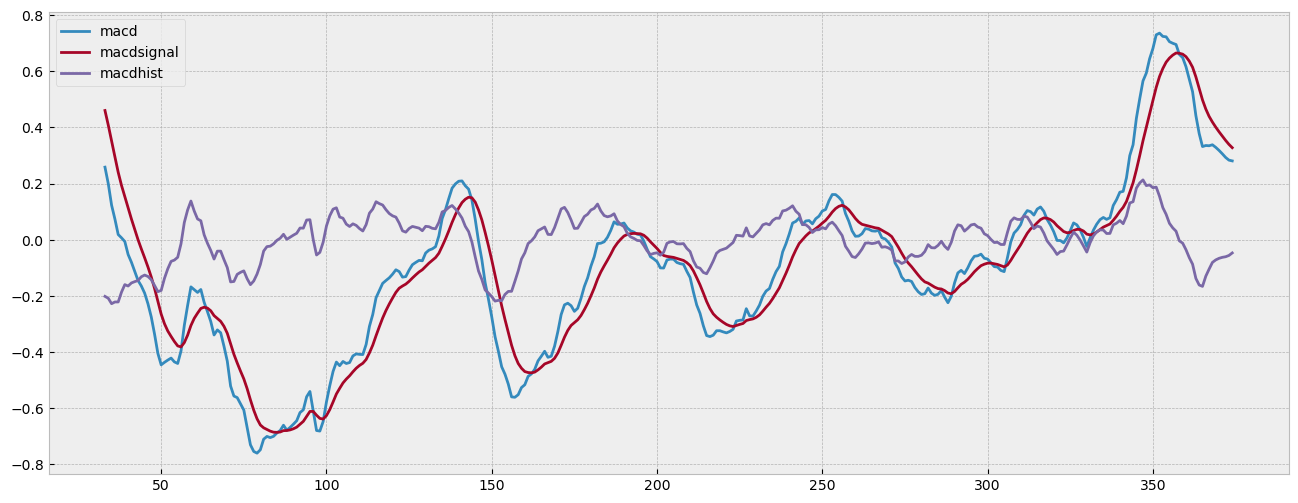

In [259]:
# MACD
aapl['macd'], aapl['macdsignal'], aapl['macdhist'] = MACD(aapl['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

aapl[['macd', 'macdsignal', 'macdhist']].plot(figsize=(16,6)) 
plt.show()

In [260]:
aapl.tail()

,Datetime,Open,High,Low,Close,Volume,aroondown,aroonup,macd,macdsignal,macdhist,RSI,OBV,AD,adx,slowk,slowd,Simple MA,EMA,arv
370,2023-07-14 15:25:00+05:30,584.700012,584.799988,584.450012,584.700012,112117,50.000000,7.142857,0.318253,0.384615,-0.066362,59.732371,-1073360.0,449226.181022,36.051545,78.666992,78.666992,584.564292,584.525308,0
371,2023-07-14 15:26:00+05:30,584.750000,584.799988,584.450012,584.700012,36528,42.857143,0.000000,0.306097,0.368911,-0.062814,59.732371,-1073360.0,464884.678406,35.110861,77.056277,78.130087,584.550005,584.548602,0
372,2023-07-14 15:27:00+05:30,584.599976,584.799988,584.450012,584.700012,45870,35.714286,7.142857,0.293085,0.353746,-0.060661,59.732371,-1073360.0,484547.821064,34.237369,78.111578,77.944949,584.557151,584.568790,0
373,2023-07-14 15:28:00+05:30,584.549988,584.750000,584.450012,584.750000,46631,28.571429,0.000000,0.283538,0.339705,-0.056166,60.641073,-1026729.0,531178.821064,33.426269,83.081622,79.416492,584.546435,584.592952,0
374,2023-07-14 15:29:00+05:30,584.650024,584.849976,584.500000,584.849976,45299,21.428571,100.000000,0.280802,0.327924,-0.047122,62.465437,-981430.0,576477.821064,32.998636,90.025996,83.739732,584.557146,584.627221,0


In [ ]:
# RSI
aapl['RSI'] = ta.RSI(aapl['Close'],14) 
aapl['RSI'].plot(figsize=(12,6)) 
plt.show()

In [ ]:
# OBV - On Balance Volume
# real_obv = OBV(close, volume)

aapl['OBV'] = OBV(aapl['Close'], aapl['Volume'])

aapl[['OBV']].plot(figsize=(16,6)) 
plt.show()

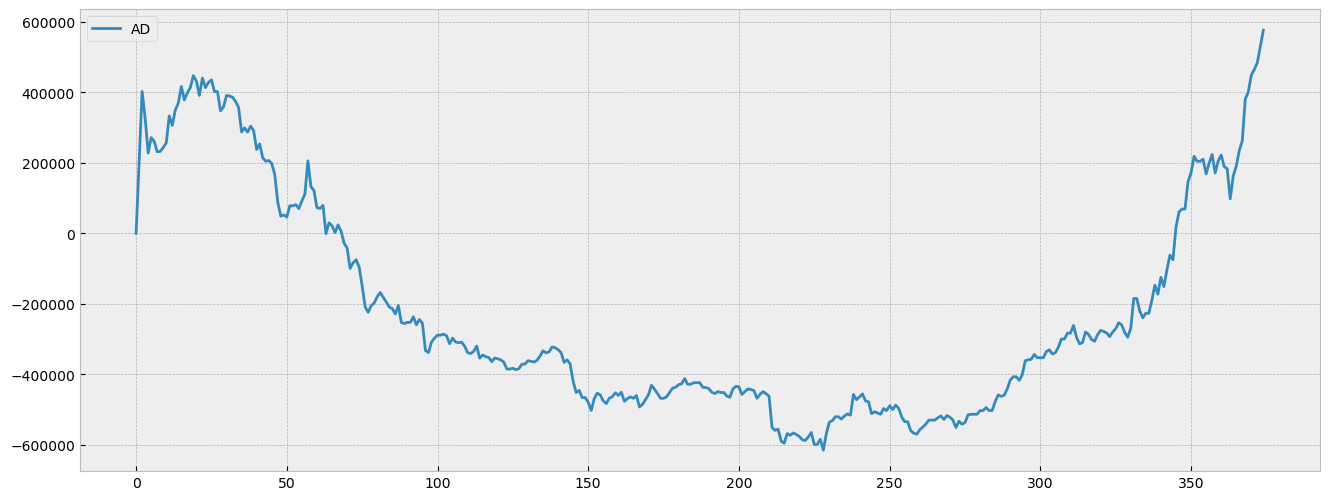

In [200]:
# Accumulation and Distribution line - Chaikin A/D Line

# AD = AD(high, low, close, volume)

aapl['AD'] = AD(aapl['High'], aapl['Low'], aapl['Close'], aapl['Volume'])

aapl[['AD']].plot(figsize=(16,6)) 
plt.show()

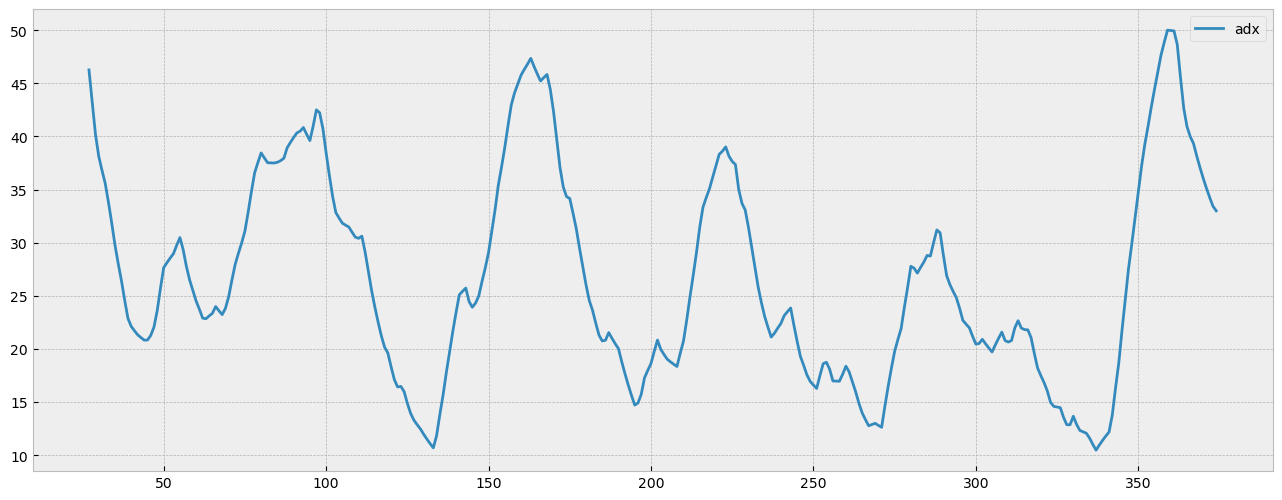

In [201]:
# ADX Indicator
"""
ADX above 20 and DI+ above DI-: That's an uptrend.
ADX above 20 and DI- above DI+: That's a downtrend.
ADX below 20 is a weak trend or ranging period
"""
aapl['adx']  = ADX(aapl['High'], aapl['Low'], aapl['Close'], timeperiod=14)

aapl[['adx']].plot(figsize=(16,6)) 
plt.show()

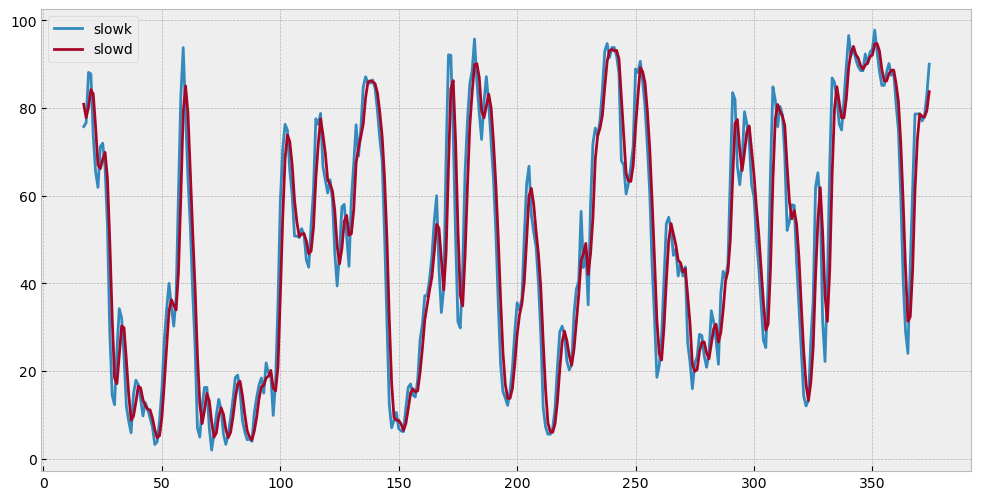

In [202]:
# Stochastic
aapl['slowk'], aapl['slowd'] = ta.STOCH(aapl['High'], aapl['Low'], aapl['Close'], fastk_period=14, slowk_period=3, 
                                        slowk_matype=0, slowd_period=3, slowd_matype=0) 
aapl[['slowk','slowd']].plot(figsize=(12,6)) 
plt.show()

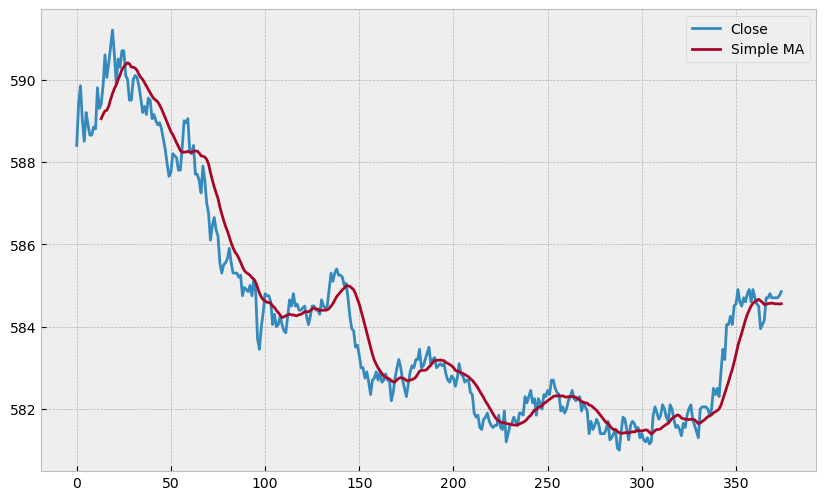

In [203]:
# Moving Average
aapl['Simple MA'] = ta.SMA(aapl['Close'],14)
aapl['EMA'] = ta.EMA(aapl['Close'], timeperiod = 14)

# Plot 
# aapl[['Close','Simple MA','EMA']].plot(figsize=(10,6))
aapl[['Close','Simple MA']].plot(figsize=(10,6))
plt.show()

In [138]:
# value based on index df[row, column]
aapl.iat[370, 7]

7.142857142857143

In [253]:
# aapl.iloc[81]['RSI']
# type(aapl.iloc[81]['RSI'])
type(ta)

module

# TA Signals

## Columns

Columns:'Datetime', 'Open', 'High', 'Low', 'Close', 'Volume', 'aroondown', 'aroonup', 'macd', 'macdsignal', 'macdhist', 'RSI', 'OBV'

# Signals

If the Aroon Up hits 100 and stays relatively close to that level 
while the Aroon Down stays near zero, that is positive confirmation of an uptrend.

When the MACD is above zero, the price is in an upward phase
the MACD line (GREEN) above the signal line (YELLOW)

When RSI moves above 70, the asset is considered overbought and could decline. 
When the RSI is below 30, the asset is oversold and could rally

When OBV is rising, it shows that buyers are willing to step in and push the price higher. 
When OBV is falling, the selling volume is outpacing buying volume, which indicates lower prices.

A/D If A/D is trending up - buying interest
    if A/D is falling - downfall

ADX above 20 and DI+ above DI-: That's an uptrend.
ADX above 20 and DI- above DI+: That's a downtrend.
ADX below 20 is a weak trend or ranging period

stochastic is often used as an overbought and oversold indicator. 
Values above 80 are considered overbought, while levels below 20 are considered oversold

## Summary Values
1. aroonup >90 && aroondown <10

2. macd > 0 && macdline > signalline

3. RSI > 70 - upward,
    RSI < 30 - downward

4. OBV - upward - will push up
    OBV - downward - will push down

5. A/D If A/D is trending up - buying interest
    if A/D is falling - downfall
    
6. ADX > 20 
    ADX above 20 and DI+ above DI-
    ADX above 20 and DI- above DI+
    ADX below 20 is a weak trend
    
7. Stochastic > 80 - overbought - will move down
              < 20 - oversold   - will move up

## Requirement:
1. Signal - if buy/sell opportunity is there - every minute
2. Signal - if any positive movement is in making



In [158]:
# for i in range(len(aapl)):
for i in range(5,10):
    print(aapl.iloc[i]['Close'])

589.2000122070312
588.9000244140625
588.6500244140625
588.6500244140625
588.8499755859375


In [204]:
aapl.columns

Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume', 'aroondown',
       'aroonup', 'macd', 'macdsignal', 'macdhist', 'RSI', 'OBV', 'AD', 'adx',
       'slowk', 'slowd', 'Simple MA', 'EMA'],
      dtype='object')

In [290]:
# arv = mav= rsv= obv = adv = adxv = stv =0

help(AROON)

Help on Function in module talib._ta_lib object:

class Function(builtins.object)
 |  Function(function_name, func_object, *args, **kwargs)
 |  
 |  This is a pythonic wrapper around TALIB's abstract interface. It is
 |  intended to simplify using individual TALIB functions by providing a
 |  unified interface for setting/controlling input data, setting function
 |  parameters and retrieving results. Input data consists of a ``dict`` of
 |  ``numpy`` arrays (or a ``pandas.DataFrame``), one array for each of open,
 |  high, low, close and volume. This can be set with the set_input_arrays()
 |  method. Which keyed array(s) are used as inputs when calling the function
 |  is controlled using the input_names property.
 |  
 |  This class gets initialized with a TALIB function name and optionally an
 |  input_arrays object. It provides the following primary functions for
 |  setting inputs and retrieving results:
 |  
 |  ---- input_array/TA-function-parameter set-only functions -----
 |  -

In [172]:
### Template
# for i in range(len(aapl)):
for i in range(0,0):
    print(aapl.iloc[i]['Datetime'], " ", aapl.iloc[i]['aroonup'], " ", aapl.iloc[i]['aroondown'])

In [280]:
# Aroon ('aroondown', 'aroonup')
""" 
aroonup >90 && aroondown <10
"""
# AROON Indicator
aapl['aroondown'], aapl['aroonup'] = AROON(aapl['High'], aapl['Low'], timeperiod=14)

# for i in range(len(aapl)):
# # for i in range(31,40):
# #     print(aapl.iloc[i]['Datetime'], " ", aapl.iloc[i]['aroonup'], " ", aapl.iloc[i]['aroondown'])
#     if(aapl.iloc[i]['aroonup'] >= 90):
# #         print(aapl.iloc[i]['Datetime'], " ", aapl.iloc[i]['aroonup'], " ", aapl.iloc[i]['aroondown'])
# #         print(aapl.iloc[i]['Datetime']," arY")
#         arv = 1
# #         print(aapl.iloc[i]['Datetime'], " ", aapl.iloc[i]['aroonup'], " ", aapl.iloc[i]['aroondown'], arv)
#     elif(aapl.iloc[i]['aroonup'] < 10):        
#         arv = 0
# #         print(aapl.iloc[i]['Datetime'], " ", aapl.iloc[i]['aroonup'], " ", aapl.iloc[i]['aroondown'], arv)
#     else:
#         arv = -1
# #         print(aapl.iloc[i]['Datetime'], " ", aapl.iloc[i]['aroonup'], " ", aapl.iloc[i]['aroondown'], arv)

In [279]:
# MACD ('macd', 'macdsignal', 'macdhist')
# for i in range(32,40):
for i in range(len(aapl)):    
    if(aapl.iloc[i]['macd'] >= 0):
        mav = 1
    else:
        mav = 0
        
#     print(aapl.iloc[i]['Datetime'], 
#           " ", aapl.iloc[i]['macd'], 
#           " ", aapl.iloc[i]['macdsignal'],
#           " ", aapl.iloc[i]['macdhist'],
#           " ", mav)

In [278]:
# RSI (RSI)
# for i in range(32,42):
for i in range(len(aapl)):
    if(aapl.iloc[i]['RSI'] >= 70):
        rsv = 1
#         print("rsiY")
    elif (aapl.iloc[i]['RSI'] <= 30):
        rsv = -1
#         print("rsiN")
    else:
        rsv = 0
#         print("rsiX")
        
#     print(aapl.iloc[i]['Datetime'], 
#           " ", aapl.iloc[i]['RSI'], " ", rsv)
    

In [277]:
# OBV (OBV)

for i in range(len(aapl)):
# for i in range(32,39):
    
    if((aapl.iloc[i]['OBV'] - aapl.iloc[i-5]['OBV']) > 0):
        obv = 1
#         print("obvY")
    else:
        obv = -1
    aap
#         print("obvN")

#     print(aapl.iloc[i]['Datetime'], 
#           " ", aapl.iloc[i]['OBV'], " ", aapl.iloc[i-4]['OBV'], " ", obv)


In [276]:
# A/D (AD)

"""
A/D If A/D is trending up - buying interest if A/D is falling - downfall

@TODO - need to check for comparision between volume vs price trend
aapl['Simple MA'] = ta.SMA(aapl['Close'],14)

Note - check for divergence
"""
for i in range(len(aapl)):
# for i in range(32,39):    
    if((aapl.iloc[i]['AD'] - aapl.iloc[i-5]['AD']) > 0):
        adv = 1
#         print("adY")
    else:
        adv = -1
#         print("adN")

#     print(aapl.iloc[i]['Datetime'], 
#           " ", aapl.iloc[i]['AD'], " ", aapl.iloc[i-5]['AD'], " ", adv)

In [275]:
# ADX (adx)
"""
@TODO - DI+ and DI- has to be implemented

ADX > 20 ADX above 20 and DI+ above DI- ADX above 20 and DI- above DI+ ADX below 20 is a weak trend

ADX above 20 and DI+ above DI-: That's an uptrend.
ADX above 20 and DI- above DI+: That's a downtrend.
ADX below 20 is a weak trend or ranging period
"""

# aapl.columns
for i in range(len(aapl)):
# for i in range(40,50):
    if((aapl.iloc[i]['adx']) > 20):
        adxv = 1
#         print("adxY")
    else:
        adxv = 0
#         print("adxN")
        
#     print(aapl.iloc[i]['Datetime'], " ", aapl.iloc[i]['adx'], " ", adxv)

In [273]:
# Stochastic (slowk)
"""
Oscillates between zero and 100, the idea is that, when the trend is up, the price should be making new highs 
and vise versa.
"""

for i in range(len(aapl)):
# for i in range(32,39):    
    if((aapl.iloc[i]['slowk'] - aapl.iloc[i-5]['slowk']) > 0):
        stov = 1
#         print("stoY")
    else:
        stov = 0
#         print("stoN")

#     print(aapl.iloc[i]['Datetime'], 
#           " ", aapl.iloc[i]['slowk'], " ", aapl.iloc[i-4]['slowk'], " ", stov)

In [252]:
# print(arv, mav, rsv, obv, adv, adxv, stv)
print(aapl.iloc[i]['Datetime'], 
          " ", aapl.iloc[i]['slowk'], " ", aapl.iloc[i-4]['slowk'], " ", stov)

0 0 0 -1 -1 1 0


In [270]:
aapl['arv'] = arv
aapl['mav'] = mav
aapl['rsv'] = rsv
aapl['obv'] = obv
aapl['adv'] = adv
aapl['adxv'] = adxv
aapl['stv'] = stv

In [ ]:
for i in range(len(aapl)):
       print(aapl.iloc[i]['Datetime']
             , " ", aapl.iloc[i]['arv'], " ", aapl.iloc[i]['mav']
            , aapl.iloc[i]['rsv'], " ", aapl.iloc[i]['obv'], " ", aapl.iloc[i]['adv'])
#              aapl.iloc[i]['adxv'], " ", aapl.iloc[i]['stv']
#             )

In [286]:
aapl


,Datetime,Open,High,Low,Close,Volume,aroondown,aroonup,macd,macdsignal,...,slowd,Simple MA,EMA,arv,mav,rsv,obv,adv,adxv,stv
0,2023-07-14 09:15:00+05:30,587.450012,588.400024,587.450012,588.400024,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,1,0,1,1,1,0
1,2023-07-14 09:16:00+05:30,588.500000,589.400024,588.200012,589.400024,198235,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,1,0,1,1,1,0
2,2023-07-14 09:17:00+05:30,589.349976,589.849976,589.049988,589.849976,204336,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,1,0,1,1,1,0
3,2023-07-14 09:18:00+05:30,589.849976,589.900024,588.650024,589.000000,171728,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,1,0,1,1,1,0
4,2023-07-14 09:19:00+05:30,589.000000,589.049988,588.500000,588.500000,99209,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2023-07-14 15:25:00+05:30,584.700012,584.799988,584.450012,584.700012,112117,50.000000,7.142857,0.318253,0.384615,...,78.666992,584.564292,584.525308,0,1,0,1,1,1,0
371,2023-07-14 15:26:00+05:30,584.750000,584.799988,584.450012,584.700012,36528,42.857143,0.000000,0.306097,0.368911,...,78.130087,584.550005,584.548602,0,1,0,1,1,1,0
372,2023-07-14 15:27:00+05:30,584.599976,584.799988,584.450012,584.700012,45870,35.714286,7.142857,0.293085,0.353746,...,77.944949,584.557151,584.568790,0,1,0,1,1,1,0
373,2023-07-14 15:28:00+05:30,584.549988,584.750000,584.450012,584.750000,46631,28.571429,0.000000,0.283538,0.339705,...,79.416492,584.546435,584.592952,0,1,0,1,1,1,0


### CSV Dev Ends
# =============================================================

In [ ]:
import pandas as pd

# make a simple dataframe
df = pd.DataFrame({'a':[1,2], 'b':[3,4]})
df
#    a  b
# 0  1  3
# 1  2  4

# create an unattached column with an index
df.apply(lambda row: row.a + row.b, axis=1)
# 0    4
# 1    6

# do same but attach it to the dataframe
df['c'] = df.apply(lambda row: row.a + row.b, axis=1)
df
#    a  b  c
# 0  1  3  4
# 1  2  4  6
